In [15]:
import tensorflow as tf

In [16]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [39]:
train_data = tf.keras.utils.image_dataset_from_directory(
    directory='dataset/',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 16011 files belonging to 16 classes.


In [43]:
train_data.get_single_element()

InvalidArgumentError: {{function_node __wrapped__DatasetToSingleElement_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Dataset had more than one element. [Op:DatasetToSingleElement]

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout,MaxPooling2D,Flatten

In [54]:
model = Sequential()

In [55]:
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(16,activation='softmax'))
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
          

In [56]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 126, 126, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 254016)            0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [57]:
model.fit(train_data,epochs=10)

Epoch 1/10
501/501 [==============================] - 92s 154ms/step - loss: 24.5693 - accuracy: 0.3740
Epoch 2/10
501/501 [==============================] - 75s 150ms/step - loss: 0.9377 - accuracy: 0.6787
Epoch 3/10
501/501 [==============================] - 75s 149ms/step - loss: 0.5368 - accuracy: 0.8199
Epoch 4/10
501/501 [==============================] - 75s 149ms/step - loss: 0.3973 - accuracy: 0.8749
Epoch 5/10
501/501 [==============================] - 75s 149ms/step - loss: 0.2807 - accuracy: 0.9109
Epoch 6/10
501/501 [==============================] - 75s 149ms/step - loss: 1.1717 - accuracy: 0.6715
Epoch 7/10
501/501 [==============================] - 75s 149ms/step - loss: 1.1566 - accuracy: 0.6439
Epoch 8/10
501/501 [==============================] - 74s 148ms/step - loss: 0.4497 - accuracy: 0.8547
Epoch 9/10
501/501 [==============================] - 75s 149ms/step - loss: 0.2770 - accuracy: 0.9182
Epoch 10/10
501/501 [==============================] - 75s 149ms/step - 

In [102]:
from PIL import Image

In [103]:
img = Image.open('orange.webp')
img = img.resize((256,256))


In [104]:
import numpy as np
img = np.array(img)
img =np.expand_dims(img, axis=0)
img.shape

(1, 256, 256, 3)

In [105]:
pred = np.argmax(model.predict(img))

1/1 [==============================] - 0s 142ms/step


In [106]:
classes = train_data.class_names

In [107]:
classes[pred]

'F_Lemon'

In [108]:
import matplotlib.pyplot as plt

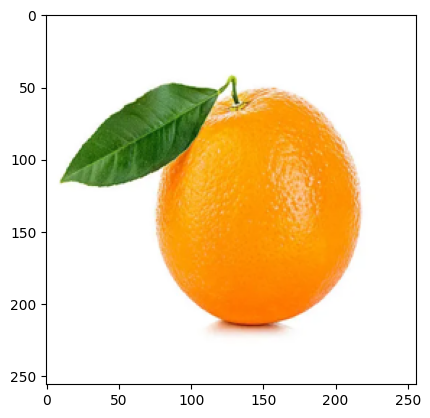

In [109]:
plt.imshow(img[0])